In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Metadata
Pclass    Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
survival  Survival (0 = No; 1 = Yes)<br>
name      Name<br>
sex       Sex<br>
age       Age<br>
sibsp     Number of Siblings/Spouses Aboard<br>
parch     Number of Parents/Children Aboard<br>
ticket    Ticket Number<br>
fare      Passenger Fare (British pound)<br>
cabin     Cabin<br>
embarked  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
df = pd.read_csv('train (2).csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q1: Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes.


In [4]:
df["Age"] = df["Age"].fillna(df['Age'].mean())
df["Embarked"] = df["Embarked"].fillna(df['Embarked'].mode())
df = df.drop(['Cabin'], axis = 1)
df = df.drop(['Name'], axis = 1)
df = df.drop(['Ticket'], axis = 1)
df = df.dropna()

In [5]:
df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

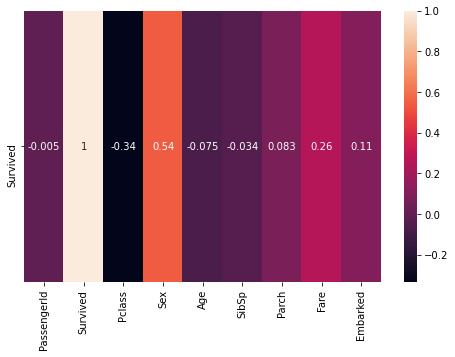

In [6]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr()[1:2], annot = True)
plt.show()

We will drop PassengerId.<br>
SibSp, Parch and Age seem to have very little effect on Survival possiblilty. However, they aren't negligible and it wouldn't make sense to drop them. <br>
Hence they will bbe considered<br>
We dropped Cabin and Name earlier. <br>
In Sex,<br>
Male = 0<br>
Female = 1<br>
In Embarked,<br>
S = 0<br>
C = 1<br>
Q = 2<br>

In [7]:
df = df.drop(['PassengerId'], axis = 1)

### Q2: Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step.

In [8]:
y = df['Survived']
X = df.drop(['Survived'], axis = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
pipe = Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.797752808988764

### Q3: Perform Bayes classification using cross validation

In [10]:
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
gnb = pipe.fit(X_train, y_train)
print(cross_val_score(gnb, X, y, cv=5))

[0.76404494 0.79213483 0.80337079 0.78651685 0.79096045]


The accuracy is quite good and has an average of 79%

### Q4: Tabulate using relevant measures of accuracy , sensitivity, specificity.

In [11]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_test)

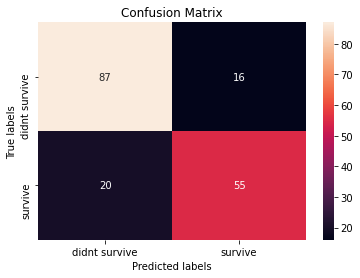

In [12]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(confusion, annot = True, fmt = "0.0f")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['didnt survive', 'survive']); ax.yaxis.set_ticklabels(['didnt survive', 'survive']);

In [13]:
TPR = confusion[1,1]/(confusion[1,1]+confusion[1,0])
TNR = confusion[0,0]/(confusion[0,0]+confusion[0,1])
ACR = (confusion[1,1] + confusion[0,0])/(confusion[0,1] + confusion[1,0] + confusion[1,1] + confusion[0,0])
print("Accuracy Rate", ACR)
print("Sensitivity", TPR)
print("Specificity", TNR) 

Accuracy Rate 0.797752808988764
Sensitivity 0.7333333333333333
Specificity 0.8446601941747572


The accuracy rate is decent.<br>
More importantly, the false negative is really low which means that we aren't giving people false hopes of survival<br>
This means that we can apply this for other cases where we have to keep false negatives at a minimum. 

### Q5: Visualize the ROC curve and comment on performance

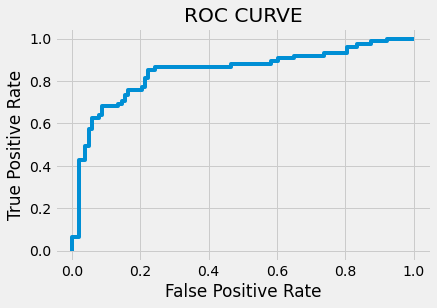

In [14]:
from sklearn.metrics import roc_curve
y_test = pd.DataFrame(y_test)
probs = gnb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,  probs[:,1])
plt.style.use('fivethirtyeight')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
# plt.legend(loc=4)
plt.show()

Performance of the classifier is really good<br>
It is almost coinicident with the y axis which is what a perfect model would look like.<br>
So, this classifier is really good and works well with the given dataset. 
